In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import hvplot.pandas

## Setup

In [2]:
# Load the dataset
file_path = Path('Resources/tickets_2024_09.csv')
parking_data = pd.read_csv(file_path)

/var/folders/tj/b8kc10px4jlb5mfbkfmw3ffw0000gn/T/ipykernel_14598/2538387339.py:3: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  parking_data = pd.read_csv(file_path)


In [3]:
# View summary of columns
parking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98493 entries, 0 to 98492
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              98493 non-null  int64  
 1   TICKET_NUMBER         98493 non-null  int64  
 2   VIOLATION_TYPE_DESC   98493 non-null  object 
 3   ISSUE_DATE            98493 non-null  object 
 4   ISSUE_TIME            98493 non-null  int64  
 5   ISSUING_AGENCY_CODE   98493 non-null  int64  
 6   ISSUING_AGENCY_NAME   98493 non-null  object 
 7   ISSUING_AGENCY_SHORT  98493 non-null  object 
 8   VIOLATION_CODE        98493 non-null  object 
 9   VIOLATION_PROC_DESC   98485 non-null  object 
 10  LOCATION              98493 non-null  object 
 11  PLATE_STATE           98493 non-null  object 
 12  VEHICLE_TYPE          0 non-null      float64
 13  MULTI_OWNER_NUMBER    98493 non-null  int64  
 14  DISPOSITION_CODE      98493 non-null  int64  
 15  DISPOSITION_TYPE   

In [4]:
# Select relevant features and target variable
data = parking_data[['VIOLATION_TYPE_DESC', 'ISSUE_TIME', 'ISSUING_AGENCY_CODE', 'XCOORD', 'YCOORD']].copy()

data

,VIOLATION_TYPE_DESC,ISSUE_TIME,ISSUING_AGENCY_CODE,XCOORD,YCOORD
0,P,657,54,NaN,NaN
1,P,133,59,NaN,NaN
2,P,1020,59,397076.780,135370.390
3,P,1051,59,397328.708,135348.587
4,P,1108,59,397328.637,135237.646
...,...,...,...,...,...
98488,P,1535,15,399383.850,135200.010
98489,P,1638,15,399995.838,135331.512
98490,P,1639,15,399995.838,135331.512
98491,P,1640,15,399995.838,135331.512


In [5]:
# Drop rows with missing values in the selected columns
data.dropna(inplace=True)


In [6]:

# Encode X-variable(s) to into integers
data['ISSUING_AGENCY_CODE'] = data['ISSUING_AGENCY_CODE'].astype('category').cat.codes

# Change y-variable to categorical type
data['VIOLATION_TYPE_DESC'] = data['VIOLATION_TYPE_DESC'].astype('category')
# Save categories
violation_categories = data['VIOLATION_TYPE_DESC'].cat.categories
# Encode categories as integers
data['VIOLATION_TYPE_DESC'] = data['VIOLATION_TYPE_DESC'].cat.codes

# Create a mapping of integer codes to category names
violation_mapping = dict(enumerate(violation_categories))
print("VIOLATION_TYPE_DESC Mapping:")
display(violation_mapping)


VIOLATION_TYPE_DESC Mapping:


{0: 'M', 1: 'P', 2: 'T', 3: 'V'}

In [7]:
# Define features (X) and target variable (y)
X = data[['ISSUE_TIME', 'ISSUING_AGENCY_CODE', 'XCOORD', 'YCOORD']]
y = data['VIOLATION_TYPE_DESC']


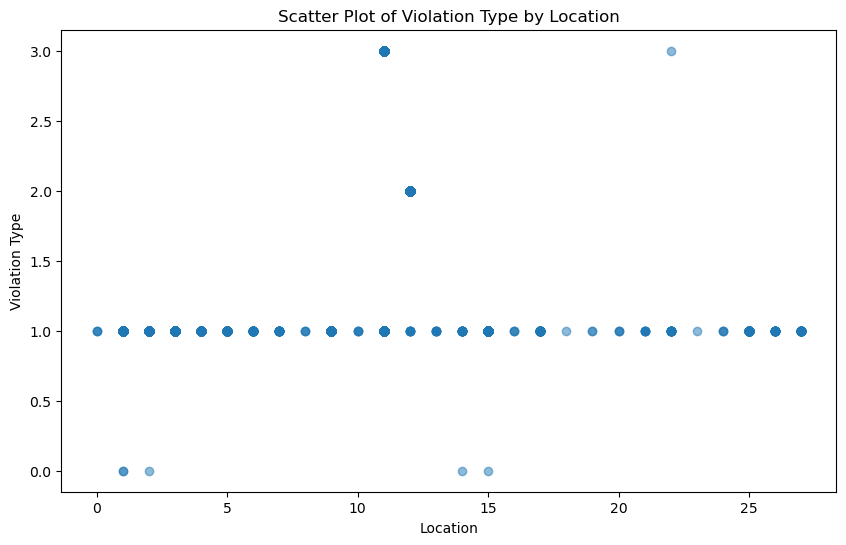

In [12]:
import matplotlib.pyplot as plt

# Scatter plot with Location on the X-axis and ViolationType on the Y-axis
plt.figure(figsize=(10, 6))
plt.scatter(data['ISSUING_AGENCY_CODE'], data['VIOLATION_TYPE_DESC'], alpha=0.5)  # Adjust alpha for visibility
plt.xlabel("Location")
plt.ylabel("Violation Type")
plt.title("Scatter Plot of Violation Type by Location")
plt.show()


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Initial Random Forest Model
" Amachine learning model provided by Scikit-learn that implements the Random Forest algorithm for classification tasks. It is an ensemble method that combines multiple decision trees to improve accuracy, reduce overfitting, and handle complex data. Each tree in the Random Forest is trained on a random sample of the data (with replacement), a process known as bagging (Bootstrap Aggregation). At each split in a decision tree, a random subset of features is considered rather than using all features. This decorrelates the trees and prevents them from making the same mistakes." - Chat GPT

In [ ]:
# Initialize and train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

In [ ]:
# Predict on the test data
y_pred = clf.predict(X_test)


In [ ]:
# Generate and print the classification report
print(classification_report(y_test, y_pred, zero_division=0))

In [15]:
location_counts = parking_data['LOCATION'].value_counts()
print(location_counts.head(10))  # Top 10 locations with most violations


LOCATION
 600 BLOCK MAINE AVE SW NORTH SI*    412
 800 BLOCK MAINE AVE SW NORTH SI*    394
 600 BLOCK NEW JERSEY AVE SE WES*    310
 900 BLOCK 23RD ST NW EAST SIDE      275
 200 BLOCK 15TH ST NW EAST SIDE      237
 400 BLOCK EYE ST NW SOUTH SIDE      232
1300 BLOCK Q ST NW NORTH SIDE        226
1400 BLOCK OKIE ST NE SOUTH SIDE     222
 400 BLOCK EYE ST NW NORTH SIDE      218
1000 BLOCK 5TH ST NW WEST SIDE       211
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Violation Types'}, xlabel='VIOLATION_TYPE_DESC'>

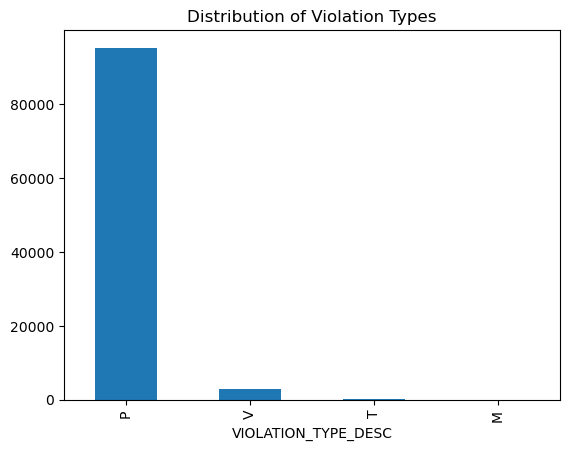

In [17]:
violation_counts = parking_data['VIOLATION_TYPE_DESC'].value_counts()
violation_counts.plot(kind='bar', title='Distribution of Violation Types')


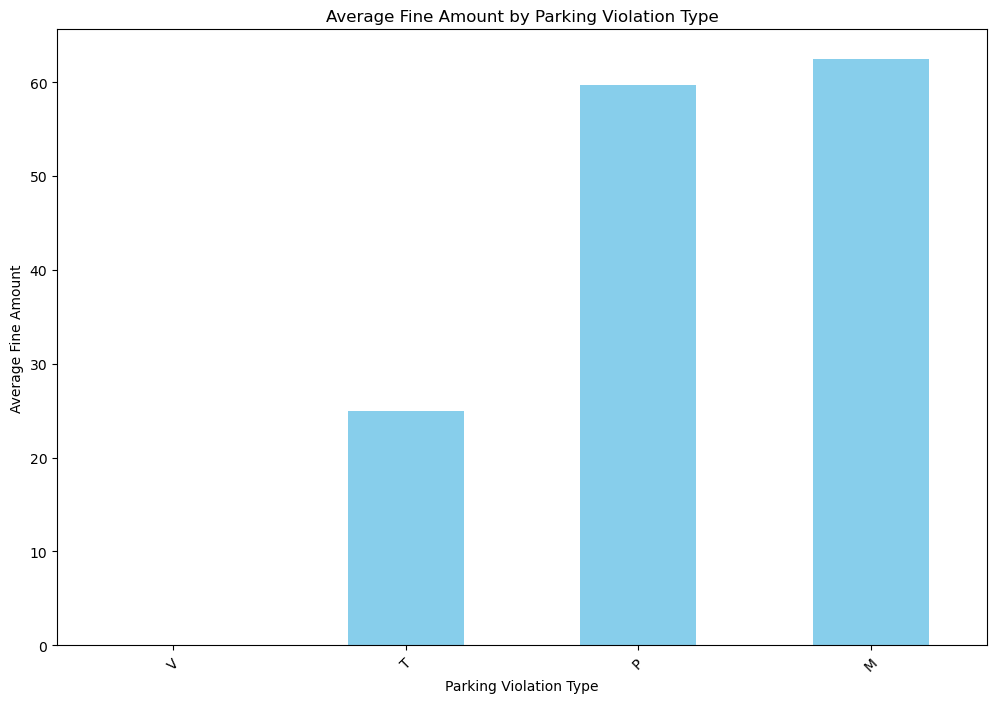

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the mean fine amount by violation type
fine_by_violation = parking_data.groupby('VIOLATION_TYPE_DESC')['FINE_AMOUNT'].mean().sort_values()

# Plot the data
plt.figure(figsize=(12, 8))
fine_by_violation.plot(kind='bar', color='skyblue')
plt.xlabel("Parking Violation Type")
plt.ylabel("Average Fine Amount")
plt.title("Average Fine Amount by Parking Violation Type")
plt.xticks(rotation=45)
plt.show()


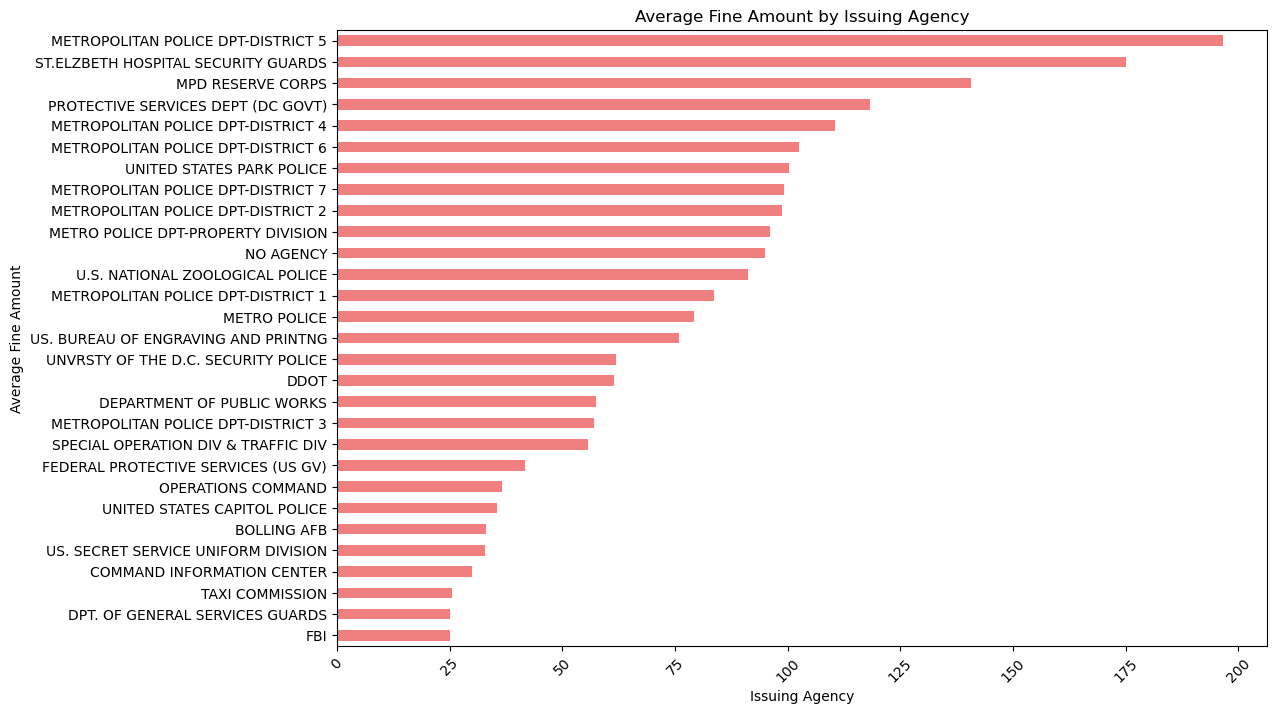

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `data` is your DataFrame containing `Fine_Amount` and `IssuingAgency`

# Calculate the mean fine amount by issuing agency
fine_by_agency = parking_data.groupby('ISSUING_AGENCY_NAME')['FINE_AMOUNT'].mean().sort_values()

# Plot the data
plt.figure(figsize=(12, 8))
fine_by_agency.plot(kind='barh', color='lightcoral')
plt.xlabel("Issuing Agency")
plt.ylabel("Average Fine Amount")
plt.title("Average Fine Amount by Issuing Agency")
plt.xticks(rotation=45)
plt.show()


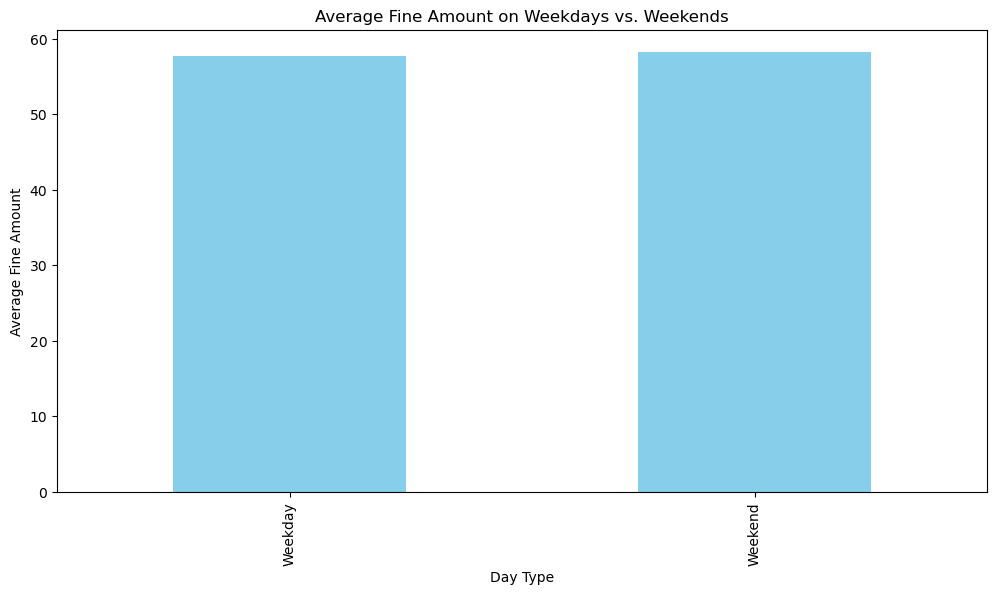

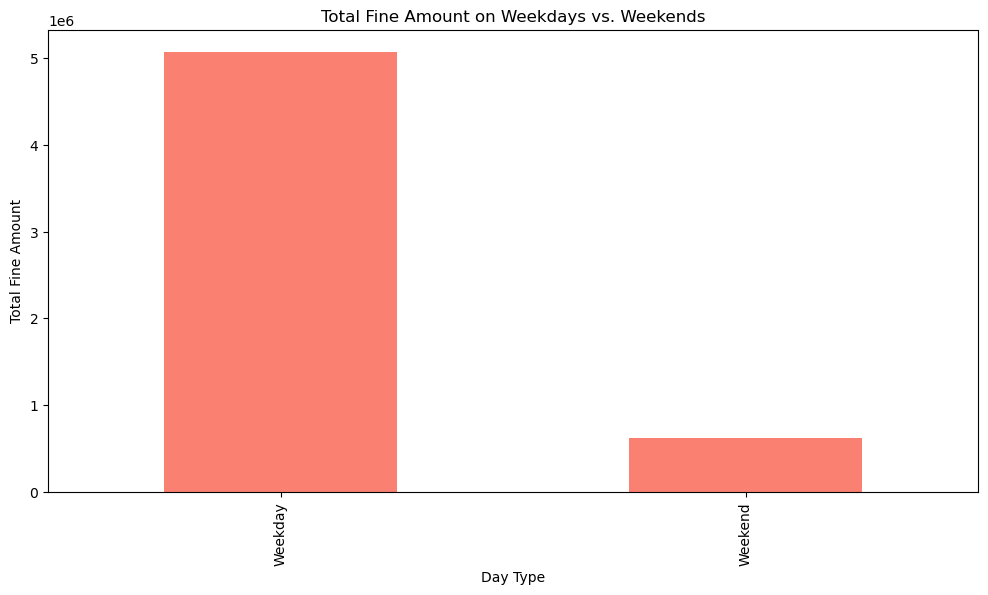

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert date column to datetime if it's not already in datetime format
# Assuming `DATE_COLUMN` contains the date information in the dataset
parking_data['Date'] = pd.to_datetime(parking_data['ISSUE_DATE'])

# Create a column to identify whether each ticket was issued on a weekday or weekend
parking_data['DayType'] = parking_data['Date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by DayType to calculate the average and total fine amounts
average_fine = parking_data.groupby('DayType')['FINE_AMOUNT'].mean()
total_fine = parking_data.groupby('DayType')['FINE_AMOUNT'].sum()

# Plot the average fine amount
plt.figure(figsize=(12, 6))
average_fine.plot(kind='bar', color='skyblue', label='Average Fine')
plt.xlabel("Day Type")
plt.ylabel("Average Fine Amount")
plt.title("Average Fine Amount on Weekdays vs. Weekends")
plt.show()

# Plot the total fine amount
plt.figure(figsize=(12, 6))
total_fine.plot(kind='bar', color='salmon', label='Total Fine')
plt.xlabel("Day Type")
plt.ylabel("Total Fine Amount")
plt.title("Total Fine Amount on Weekdays vs. Weekends")
plt.show()


In [ ]:
s